**References**    
https://discourse.holoviz.org/t/how-to-show-hide-overlay-depending-on-zoom-level/61/2  
**Operation**  
http://holoviews.org/user_guide/Transforming_Elements.html  
**Param**  
https://param.holoviz.org/Reference_Manual/param.html  
**Responding to events . Colormap Interactive**  
https://holoviews.org/user_guide/Responding_to_Events.html  
**Annotation of Data**  
https://holoviews.org/user_guide/Annotating_Data.html  
**ColorMap and Datashader**  
https://datashader.org/FAQ.html  
**Xarray interpolation**  
http://xarray.pydata.org/en/stable/interpolation.html



In [1]:
import obspy
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# import obspy
# import os
# import glob
# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr
# import hvplot.xarray
import holoviews as hv
from holoviews.operation.datashader import datashade, rasterize
from holoviews import opts
from holoviews.operation.datashader import dynspread

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
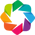

In [2]:
hv.extension('bokeh')
hv.output(backend='bokeh')

In [3]:
from holoviews import streams

from scipy.interpolate import RectBivariateSpline

In [4]:
gdata=np.load("gain_data_f64.npy",allow_pickle=True)
times=[t for t in range(0,gdata.shape[0])]
channels=[c for c in range(0,648)]


xarr_gdata=xr.Dataset(
        {
            'amplitudes':(('channels','time'),gdata.T)
        },
        {
            "channels":channels,"time":times
        }
    )

In [5]:
xarr_gdata

<xarray.Dataset>
Dimensions:     (channels: 648, time: 5601)
Coordinates:
  * channels    (channels) int64 0 1 2 3 4 5 6 7 ... 641 642 643 644 645 646 647
  * time        (time) int64 0 1 2 3 4 5 6 ... 5595 5596 5597 5598 5599 5600
Data variables:
    amplitudes  (channels, time) float64 0.0 0.1202 ... -8.778e+04 -8.832e+04

In [6]:
#Event capturing
#http://holoviews.org/user_guide/Custom_Interactivity.html

In [7]:
gain_hv_ds=hv.Dataset(xarr_gdata)
gain_hv_image=hv.Image(gain_hv_ds)

In [8]:
gain_hv_image.data.amplitudes.loc[0:600,300:400]#{channels:(0,600),time:(300,400)}

<xarray.DataArray 'amplitudes' (channels: 601, time: 101)>
array([[ -791.72470042,  -787.02627991,  -782.372199  , ...,
         -464.5979522 ,  -229.19164687,     8.42846662],
       [ -806.82224368,  -836.99987248,  -867.57290244, ...,
         -852.1454289 ,  -864.88505362,  -877.91260033],
       [   44.04089453,   -26.85416719,   -98.55780148, ...,
        -1038.93791331, -1305.55301993, -1574.89970265],
       ..., 
       [ -385.21307391,  -386.60075931,  -387.94644247, ...,
         -352.88099774,  -351.24346761,  -349.58908368],
       [ -338.1435808 ,  -338.78872935,  -339.38507819, ...,
         -335.19621808,  -333.27462081,  -331.34628169],
       [ -291.07410756,  -290.97671983,  -290.82373491, ...,
         -317.51157868,  -315.30591633,  -313.10362405]])
Coordinates:
  * channels  (channels) int64 0 1 2 3 4 5 6 7 ... 594 595 596 597 598 599 600
  * time      (time) int64 300 301 302 303 304 305 ... 395 396 397 398 399 400

In [9]:
gain_hv_image[0:10,113:200].data

<xarray.Dataset>
Dimensions:     (channels: 11, time: 88)
Coordinates:
  * channels    (channels) int64 0 1 2 3 4 5 6 7 8 9 10
  * time        (time) int64 113 114 115 116 117 118 ... 195 196 197 198 199 200
Data variables:
    amplitudes  (channels, time) float64 169.8 172.8 175.9 ... 108.7 111.2 113.9

In [10]:
OUTPUT_HEIGHT=600
OUTPUT_WIDTH=600

In [116]:
from holoviews.operation import Operation
import param
import time
#https://param.holoviz.org/Reference_Manual/param.html
class image_interpolate(hv.Operation):
    
    
    
    
   
    chan_min_ = param.Integer()
    chan_max_ = param.Integer()
    time_min_ = param.Integer()
    time_max_ = param.Integer()
    window_width_=param.Integer()
    window_height_=param.Integer()
#     max_val_time_=param.Integer()
#     max_val_chan_=param.Integer()
    interpolation_fn_=param.Callable()
    
    
    def _process(self,element,key=None):
        
        time_0=time.time()
        
        ###### Interpolation START #####
       
        chan_min=self.p.chan_min_
        chan_max=self.p.chan_max_
        if chan_min<0 or chan_max < 0:
            return element
        
        time_min=self.p.time_min_
        time_max=self.p.time_max_
        if time_min < 0 or time_max < 0:
            return element
      
        
        output_channels=np.linspace(self.p.chan_min_,self.p.chan_max_,self.p.window_width_)
        output_time=np.linspace(self.p.time_min_,self.p.time_max_,self.p.window_height_)
        
        new_data=self.p.interpolation_fn_(output_channels,output_time)

       
        print(new_data.shape,output_channels.shape,output_time.shape)
        ###### INTERPOLATION END  ######
           
           
        #element=element.clone()
        print("old: ", element.data)
        element.data["amplitudes"]=(('channels','time'),new_data)
        element.data.coords['channels']=output_channels
        element.data.coords['time']=output_time
        print("new: ", element.data)
        
#         xrimg=xr.Dataset()
#         xrimg['amplitudes']=(('channels','time'),new_data)
#         xrimg.coords['channels']=output_channels
#         xrimg.coords['time']=output_time

#         hvsrimg=hv.Dataset(xrimg)
#         element=hv.Image(hvsrimg)
        
        time_end=time.time()
                
        return element,time_end-time_0#,xrimg,new_data.T   #uncomment for test. comment for dynamic zoom



**The following cell is for Test of the above class**

In [117]:
#Uncomment the return value in the above code
cmin=50
cmax=200
tmin=2002
tmax=4213
rbvs_test=RectBivariateSpline(x=xarr_gdata.channels,y=xarr_gdata.time,z=xarr_gdata.amplitudes)
print(callable(rbvs_test))
elem,del_t=image_interpolate(gain_hv_image[(0,OUTPUT_WIDTH-1),(0,OUTPUT_HEIGHT-1)],
       
                           chan_min_=cmin,
                           chan_max_=cmax,
                           time_min_=tmin,
                           time_max_=tmax,
                           window_width_=OUTPUT_WIDTH,
                           window_height_=OUTPUT_HEIGHT,
#                            max_val_time_=5600,
#                            max_val_chan_=648,
                           interpolation_fn_=rbvs_test
                               
                        )

True
(600, 600) (600,) (600,)
old:  <xarray.Dataset>
Dimensions:     (channels: 600, time: 600)
Coordinates:
  * channels    (channels) int64 0 1 2 3 4 5 6 7 ... 593 594 595 596 597 598 599
  * time        (time) int64 0 1 2 3 4 5 6 7 ... 592 593 594 595 596 597 598 599
Data variables:
    amplitudes  (channels, time) float64 0.0 0.1202 0.4643 ... 469.9 466.8 463.5
new:  <xarray.Dataset>
Dimensions:     (channels: 600, time: 600)
Coordinates:
  * channels    (channels) float64 50.0 50.25 50.5 50.75 ... 199.5 199.7 200.0
  * time        (time) float64 2.002e+03 2.006e+03 ... 4.209e+03 4.213e+03
Data variables:
    amplitudes  (channels, time) float64 661.4 8.705e+03 ... 2.09e+04 2.119e+04


In [98]:
print(del_t)

0.012158393859863281


In [99]:
from holoviews.streams import Params

class Style(param.Parameterized):

    cmap = param.ObjectSelector(default="viridis", objects=['gray','viridis', 'plasma', 'magma'])
    clim= param.NumericTuple((-5000,5000))
    
style = Style()

stream = Params(style)

#image.apply.opts(streams=[stream],colorbar=True, width=400)

In [100]:

        
ranges_x=[] 
ranges_y=[]
dim_x=[]
dim_y=[]

rbvs=RectBivariateSpline(x=xarr_gdata.channels,y=xarr_gdata.time,z=xarr_gdata.amplitudes)
img_list=[]
delta_ts=[]
int_img_list=[]
def onRangeXY(img, x_range, y_range):
    if x_range is None or y_range is None:
        return img
#     ranges_x.append(x_range)
#     ranges_y.append(y_range)
#     dim_x.append(img.dimension_values(0,expanded=False).shape[0])
#     dim_y.append(img.dimension_values(1,expanded=False).shape[0])
    img_list.append(img[(0,OUTPUT_WIDTH-1),(0,OUTPUT_HEIGHT-1)])
    elem,del_t=image_interpolate(#img[(x_range[0],x_range[1]),(y_range[0],y_range[1])],
                           img[(0,OUTPUT_WIDTH-1),(0,OUTPUT_HEIGHT-1)],
                           chan_min_=min(int(x_range[0]),int(x_range[1])),
                           chan_max_=max(int(x_range[0]),int(x_range[1])),
                           time_min_ = min(int(y_range[0]),int(y_range[1])),
                           time_max_=max(int(y_range[0]),int(y_range[1])),
                           window_width_=OUTPUT_WIDTH,
                           window_height_=OUTPUT_HEIGHT,
                           max_val_time_=img.dimension_values(1,expanded=False).shape[0],
                           max_val_chan_=img.dimension_values(0,expanded=False).shape[0],
                           interpolation_fn_=rbvs
                          )
    delta_ts.append(del_t)
    int_img_list.append(elem)
    return elem
    
rangexy_stream=hv.streams.RangeXY(source=gain_hv_image)
range_xy=[rangexy_stream]


filtered_rxy=gain_hv_image.apply(onRangeXY,streams=range_xy)
# shade=rasterize(filtered_rxy,#cmap=hv.Palette.colormaps["grayscale"],
#                 streams=range_xy,
#                 precompute=True)

shade=rasterize(filtered_rxy)
# shade=datashade(filtered_rxy,#cmap=hv.Palette.colormaps["grayscale"],
#                 streams=range_xy,
#                 precompute=True)
#range_xy.append(stream)


#shade=shade.opts(opts.Image(invert_yaxis=True,width=OUTPUT_WIDTH,height=OUTPUT_HEIGHT,colorbar=True))
#https://datashader.org/FAQ.html
###
shade=shade.apply.opts(streams=[stream]).opts(colorbar=True,width=OUTPUT_WIDTH,height=OUTPUT_HEIGHT,invert_yaxis=True)

In [101]:
print(shade)

:DynamicMap   []


In [102]:
import panel as pn

clim_wid=pn.widgets.RangeSlider(start=np.min(gdata),end=np.max(gdata),step=100,orientation='horizontal')

def clim_callback(*events):
    print(events)
    print(events[0].new)
    style.clim=events[0].new

#clim_wid.param.unwatch(watcher)

watcher=clim_wid.param.watch(clim_callback,['value'],onlychanged=True)

In [103]:
#color_select_wid=pn.widgets.

In [104]:
import panel as pn
pn.Column(pn.panel(style.param,parameters=['cmap']),
          clim_wid,shade << hv.Distribution(np.histogram(gdata)) << hv.Distribution(np.histogram(gdata)))

Column
    [0] Column(margin=5, name='Param15116', width=300)
        [0] StaticText(value='<b>Style</b>')
        [1] Select(name='Cmap', options=OrderedDict([('gray', ...]), value='viridis')
    [1] RangeSlider(end=845026.18756580458, start=-900527.82200823317, step=100, value=(-900527.82200823317, ...)
    [2] HoloViews(AdjointLayout)

Xarray interpolation 

In [113]:
img_list

[:Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes),
 :Image   [channels,time]   (amplitudes)]

In [114]:
delta_ts

[0.011504650115966797,
 0.022292613983154297,
 0.011638402938842773,
 0.011991024017333984,
 0.01227259635925293,
 0.011721134185791016]

In [118]:
layout=int_img_list[0]+img_list[-1]
layout

:Layout
   .Image.I  :Image   [channels,time]   (amplitudes)
   .Image.II :Image   [channels,time]   (amplitudes)

In [67]:
%time
time0=time.time()
int_img_list[0]
time1=time.time()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.2 µs


In [68]:
time1-time0

6.699562072753906e-05

In [ ]:
da = xr.DataArray(np.sin(np.linspace(0, 2 * np.pi, 10)), dims='x',
                    coords={'x': np.linspace(0, 1, 10)})

In [ ]:
da

In [ ]:
da_ds=xr.Dataset()
da_ds["values"]=(("x"),da.data)
da_ds.coords["x"]=da.x
#da_ds.coords["space"]=da.space

In [ ]:
da_ds

In [ ]:
hv.Curve(hv.Dataset(da_ds)).opts(tools=["hover"])

In [ ]:
da_ds["values"]=da_ds["values"].interp(time=np.linspace(-5,5,4),space=np.linspace(0,1,5))

In [ ]:
da_ds

In [ ]:
hv.Curve(hv.Dataset(da_ds)).opts(tools=["hover"])

In [72]:
list(hv.Store.registry['bokeh'])

[holoviews.core.overlay.Overlay,
 holoviews.core.overlay.NdOverlay,
 holoviews.core.spaces.GridSpace,
 holoviews.core.spaces.GridMatrix,
 holoviews.core.layout.AdjointLayout,
 holoviews.core.layout.Layout,
 holoviews.core.layout.NdLayout,
 holoviews.element.chart.Curve,
 holoviews.element.chart.Bars,
 holoviews.element.geom.Points,
 holoviews.element.chart.Scatter,
 holoviews.element.chart.ErrorBars,
 holoviews.element.chart.Spread,
 holoviews.element.chart.Spikes,
 holoviews.element.chart.Area,
 holoviews.element.geom.VectorField,
 holoviews.element.chart.Histogram,
 holoviews.element.raster.Image,
 holoviews.element.raster.RGB,
 holoviews.element.raster.HSV,
 holoviews.element.raster.Raster,
 holoviews.element.raster.HeatMap,
 holoviews.element.raster.QuadMesh,
 holoviews.element.path.Path,
 holoviews.element.path.Contours,
 holoviews.element.path.Box,
 holoviews.element.path.Bounds,
 holoviews.element.path.Ellipse,
 holoviews.element.path.Polygons,
 holoviews.element.geom.Rectangles

In [75]:
hv.Store.renderers["bokeh"].webgl=True

In [80]:
hv.Store.renderers

OrderedDict([('bokeh',
              BokehRenderer(backend='bokeh', css={}, dpi=None, fig='html', fps=20, holomap='auto', info_fn=<function Exporter.<lambda> at 0x7f7d54db8c80>, key_fn=None, mode='default', name='BokehRenderer00099', post_render_hooks={'svg': [], 'png': []}, size=100, theme=<bokeh.themes.theme.Theme object at 0x7f7d4ce53e48>, webgl=True, widget_location=None, widget_mode='embed'))])